# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [5]:
# ваш код тут
beta_rv = sts.beta(2, 2)
sample = beta_rv.rvs(100)
sample
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# cosine_rv = sts.cosine()
# sample = cosine_rv.rvs(100)
# sample

array([0.03986202, 0.53929179, 0.7778607 , 0.71504126, 0.63018627,
       0.43271078, 0.65706028, 0.55548436, 0.81606604, 0.25021052,
       0.39901479, 0.3507801 , 0.09114614, 0.61814168, 0.39206484,
       0.95653881, 0.30534675, 0.49827667, 0.83115014, 0.33708745,
       0.56916811, 0.01782726, 0.70795378, 0.66257707, 0.80771729,
       0.49323638, 0.32594717, 0.65666271, 0.58590315, 0.2848505 ,
       0.25169798, 0.34713071, 0.44810175, 0.34183478, 0.32187686,
       0.85117816, 0.66279791, 0.28799441, 0.31037006, 0.44261261,
       0.33363639, 0.34583666, 0.45570456, 0.53778588, 0.93304983,
       0.40035442, 0.17922725, 0.03272397, 0.48436599, 0.69633534,
       0.25058004, 0.42520262, 0.49866105, 0.42495137, 0.6159648 ,
       0.09285501, 0.29589974, 0.28218476, 0.59456367, 0.57136655,
       0.59159024, 0.33657797, 0.7394439 , 0.78046881, 0.20001079,
       0.32049264, 0.22422766, 0.42069252, 0.11772703, 0.46298233,
       0.70898257, 0.53966305, 0.52215314, 0.61118032, 0.78430

In [6]:
sample.dtype

dtype('float64')

In [11]:
real_mean = beta_rv.mean()
real_mean
# real_mean = cosine_rv.mean() # настоящее среднее случайной величины

0.5

In [10]:
real_var = beta_rv.var()
real_var
# real_var = cosine_rv.var() # настоящая дисперсия случайной величины

0.05

### Постройте гистограмму выборки и теоретическую плотность распределения

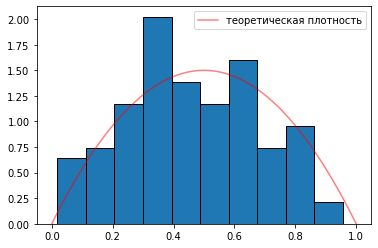

In [20]:
# ваш код тут
plt.hist(sample, density=True, edgecolor='black')
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5, color='r')
plt.legend()

In [21]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.4598344697239888
0.04886456416338003


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

По цпт выборка $\overline{X} ∼ N(\mu,\frac{\sigma}{\sqrt{N}})$




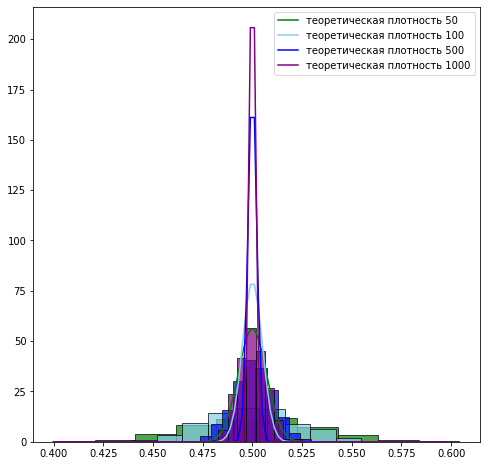

In [92]:
# ваш код тут
# берем 100 со старта (с выборки больше размера 30 применяется ЦПТ)
fig = plt.figure(figsize=(8,8))
def plot_hyst(n, color, color2):
  sample_mean = []
  # 1000 эксперементов для среднего (чтобы построить гистограмму)
  for i in range(0, 1000):
    sample = beta_rv.rvs(n)
    sample_mean.append(sample.mean())
  # теоретическое распределение среднего
  rv_normal = sts.norm(beta_rv.mean(), beta_rv.var()/math.sqrt(n))

  plt.hist(sample_mean, density=True, edgecolor='black', color=color, alpha=0.7)
  x = np.linspace(0.4, 0.6, 100)
  pdf = rv_normal.pdf(x)
  plt.plot(x, pdf, label=f'теоретическая плотность {n}', alpha=1, color=color2)
  plt.legend()

plot_hyst(50, 'green', 'green')
plot_hyst(100, 'skyblue', 'skyblue')
plot_hyst(500, 'blue', 'blue')
plot_hyst(1000, 'purple', 'purple')

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Из графика видно, что довольно неплохо. С увеличением размера выборки гистограмма стремится к 0.5 (в целом как и график pdf), что совпадает с теоретическим средним beta-распределения, которое мы выбрали. Но с увеличением N график теоретического распределения стремительно уходит вверх, когда гистограмма не настолько сильно стремится вверх

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [34]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [97]:
df = df[['churn', 'total day calls']]
# зачем вообще churn. Нам типо надо разбить df по churn=True и churn=False и сравнить?
# ок. так и сделаю

In [115]:
df1 = df[df['churn'] == False]['total day calls'].to_numpy()
df2 = df[df['churn'] == True]['total day calls'].to_numpy()

In [131]:
# строим доверительные интервалы уровня доверия 0.99
def mean_interval(data, epsilon=0.01):
  n = data.shape[0]

  quantil = sts.norm.ppf(1-epsilon/2)
  alpha_left = data.mean() - (data.std(ddof=1)*quantil)/(math.sqrt(n))
  alpha_right = data.mean() + (data.std(ddof=1)*quantil)/(math.sqrt(n))
  print(f'Доверительный интервал с уровнем доверия {1-epsilon}: ({alpha_left:.3f}, {alpha_right:.3f})')
  return (alpha_left, alpha_right)

print('churn = False')
mean_interval(df1)
print()

print('churn = True')
mean_interval(df2)
print()

# причем можно сравнить размеры выборок:
print(f'len df1: {len(df1)}, len df2: {len(df2)}')
print()

# ну и доверительные интервал для всей выборки
final = mean_interval(np.concatenate([df1, df2]))

churn = False
Доверительный интервал с уровнем доверия 0.99: (99.328, 101.239)

churn = True
Доверительный интервал с уровнем доверия 0.99: (98.806, 103.865)

len df1: 2850, len df2: 483

Доверительный интервал с уровнем доверия 0.99: (99.540, 101.331)


Оценим дисперсию

In [135]:
def var_interval(data, epsilon=0.01):
  n = len(data)
  quantil_low = sts.chi.ppf(1-epsilon/2, n-1)
  quantil_high = sts.chi.ppf(epsilon/2, n-1)

  alpha_left_var = data.std(ddof=1)*(n-1)/quantil_low
  alpha_right_var = data.std(ddof=1)*(n-1)/quantil_high
  print(f'Доверительный интервал с уровнем доверия {1-epsilon}: ({alpha_left_var:.3f}, {alpha_right_var:.3f})')

print('churn = False')
var_interval(df1)
print()

print('churn = True')
var_interval(df2)
print()

# причем можно сравнить размеры выборок:
print(f'len df1: {len(df1)}, len df2: {len(df2)}')
print()

# ну и доверительные интервал для всей выборки
final = var_interval(np.concatenate([df1, df2]))

churn = False
Доверительный интервал с уровнем доверия 0.99: (1021.958, 1094.156)

churn = True
Доверительный интервал с уровнем доверия 0.99: (437.362, 516.414)

len df1: 2850, len df2: 483

Доверительный интервал с уровнем доверия 0.99: (1122.953, 1196.118)


Оценим среднее с помощью built-in метода

In [147]:
from statsmodels.stats.weightstats import _zconfint_generic

z1 = _zconfint_generic(df1.mean(), df1.std(), alpha=0.99, alternative='two-sided')
z2 = _zconfint_generic(df2.mean(), df2.std(), alpha=0.99, alternative='two-sided')

print(z1, z2, sep='\n')

(100.03502424153596, 100.53129154793773)
(101.06518270436351, 101.60562474905265)


Оценки средних похожи, но тут точнее (не удивительно, разработчики много сил вкладывают в оптимизацию вычислений библиотечных методов)